In [ ]:
# Omar Ghassan    202111069

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("mammographic_masses.csv", na_values = ["?"])

In [3]:
'''
headerList = ["BI-RADS", "age", "shape", "margin", "density", "severity"]
df = df.to_csv("mammographic_masses.csv", header = headerList, index = False)
'''

'\nheaderList = ["BI-RADS", "age", "shape", "margin", "density", "severity"]\ndf = df.to_csv("mammographic_masses.csv", header = headerList, index = False)\n'

In [4]:
df

,BI-RADS,age,shape,margin,density,severity
0,4.0,43.0,1.0,1.0,NaN,1.0
1,5.0,58.0,4.0,5.0,3.0,1.0
2,4.0,28.0,1.0,1.0,3.0,0.0
3,5.0,74.0,1.0,5.0,NaN,1.0
4,4.0,65.0,1.0,NaN,3.0,0.0
...,...,...,...,...,...,...
1022,4.0,47.0,2.0,1.0,3.0,0.0
1023,4.0,56.0,4.0,5.0,3.0,1.0
1024,4.0,64.0,4.0,5.0,3.0,0.0
1025,5.0,66.0,4.0,5.0,3.0,1.0


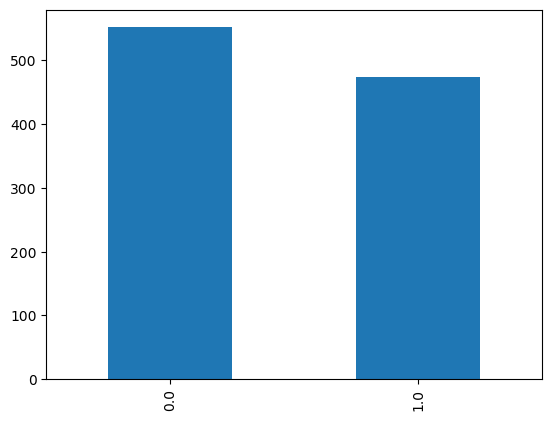

In [5]:
df["severity"].value_counts().plot(kind='bar');

In [6]:
df_missing = df.loc[(df["age"].isna()) | (df["shape"].isna()) | (df["margin"].isna()) | (df["density"].isna()) | (df["severity"].isna())]

In [7]:
df_missing

,BI-RADS,age,shape,margin,density,severity
0,4.0,43.0,1.0,1.0,NaN,1.0
3,5.0,74.0,1.0,5.0,NaN,1.0
4,4.0,65.0,1.0,NaN,3.0,0.0
5,4.0,70.0,NaN,NaN,3.0,0.0
6,5.0,42.0,1.0,NaN,3.0,0.0
...,...,...,...,...,...,...
823,6.0,40.0,NaN,3.0,4.0,1.0
883,5.0,NaN,4.0,4.0,3.0,1.0
922,5.0,NaN,4.0,3.0,3.0,1.0
960,1.0,1.0,3.0,0.0,NaN,NaN


In [8]:
df = df.fillna(df.median())

In [9]:
df

,BI-RADS,age,shape,margin,density,severity
0,4.0,43.0,1.0,1.0,3.0,1.0
1,5.0,58.0,4.0,5.0,3.0,1.0
2,4.0,28.0,1.0,1.0,3.0,0.0
3,5.0,74.0,1.0,5.0,3.0,1.0
4,4.0,65.0,1.0,3.0,3.0,0.0
...,...,...,...,...,...,...
1022,4.0,47.0,2.0,1.0,3.0,0.0
1023,4.0,56.0,4.0,5.0,3.0,1.0
1024,4.0,64.0,4.0,5.0,3.0,0.0
1025,5.0,66.0,4.0,5.0,3.0,1.0


In [10]:
# Separate the columns of “messes_data” into “X” and “y”, 
# where “X” contains the columns “BI-RADS”, ”age”, ”shape”, ”margin”, and ”density”
# and “y” contain “severity” only.

x = df.iloc[:, 0 : -1]

In [11]:
# Separate the columns of “messes_data” into “X” and “y”, 
# where “X” contains the columns “BI-RADS”, ”age”, ”shape”, ”margin”, and ”density”
# and “y” contain “severity” only.

y = df["severity"]

In [12]:
# Use train_test_split command to prepare X_train, X_test, y_train, and y_test.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [13]:
# Use logistic regression algorithm to model the prepared training data.

train_data = LogisticRegression(fit_intercept = True, max_iter = 5000, random_state = 5)

In [14]:
# Use logistic regression algorithm to predict the test data.

predict_data = train_data.fit(x_train, y_train)

In [15]:
#Use logistic regression algorithm to predict the test data.

predict_data = predict_data.predict(x_test)

In [16]:
# Use the sklearn “accuracy_score” to find the accuracy of your developed model on testing data.

accuracy = accuracy_score(y_test, predict_data)

In [17]:
# Print the obtained accuracy from previous question.

accuracy

0.8398058252427184